<a href="https://colab.research.google.com/github/herusy/Machine_Learning/blob/main/%D0%93%D0%B5%D1%80%D1%83%D1%81_%D0%BF%D1%80_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Герус Я.О. ФІТ 4-8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 1. Завантаження даних

california_data = fetch_california_housing()

X = california_data.data
y = california_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Побудова та оцінка регресійної моделі

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Базова модель (Лінійна регресія):")
print(f"Навчальні дані: MSE = {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"Тестові дані: MSE = {test_mse:.2f}, R^2 = {test_r2:.2f}")

Базова модель (Лінійна регресія):
Навчальні дані: MSE = 0.52, R^2 = 0.61
Тестові дані: MSE = 0.56, R^2 = 0.58


# 3. Аналіз перенавчання
 Різниця між MSE і R² на навчальних і тестових вибірках незначна. Це означає, що модель показує схожі результати на обох наборах даних, що свідчить про відсутність перенавчання.

In [ ]:
# 4. Запобігання перенавчанню

alphas = np.logspace(0, 4, 100)

# Ridge Regression
ridge_cv_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(-scores.mean())

# Lasso Regression
lasso_cv_scores = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(-scores.mean())


best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Найкраще значення alpha для Ridge: {best_ridge_alpha}")
print(f"Найкраще значення alpha для Lasso: {best_lasso_alpha}")


Найкраще значення alpha для Ridge: 8.497534359086444
Найкраще значення alpha для Lasso: 1.0


In [ ]:
# 5. Оцінка результатів

ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_y_test_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
lasso_y_test_pred = lasso_model.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, ridge_y_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_y_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_y_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_y_test_pred)

print(f"Ridge Regression: MSE = {ridge_test_mse:.2f}, R^2 = {ridge_test_r2:.2f}")
print(f"Lasso Regression: MSE = {lasso_test_mse:.2f}, R^2 = {lasso_test_r2:.2f}")

Ridge Regression: MSE = 0.56, R^2 = 0.58
Lasso Regression: MSE = 0.94, R^2 = 0.28


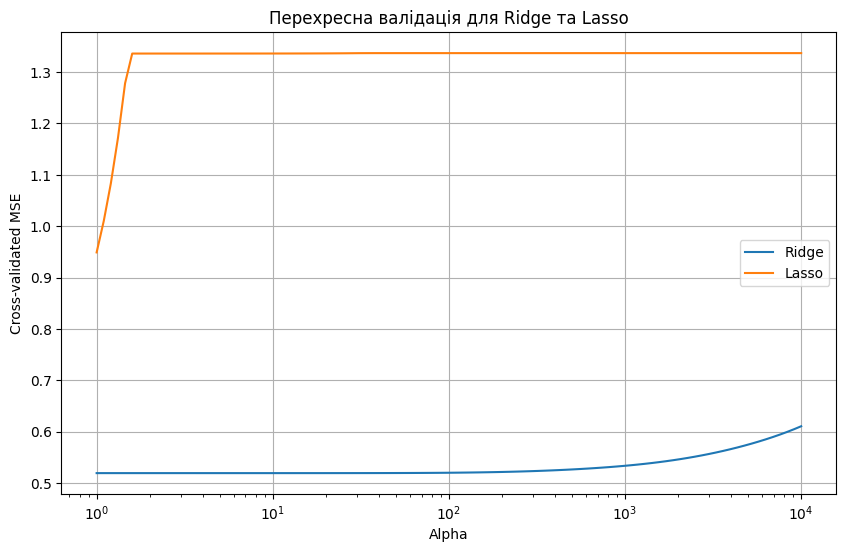

In [ ]:
# 6. Візуалізація результатів регуляризації

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, ridge_cv_scores, label='Ridge')
plt.semilogx(alphas, lasso_cv_scores, label='Lasso')
plt.xlabel('Alpha')
plt.ylabel('Cross-validated MSE')
plt.title('Перехресна валідація для Ridge та Lasso')
plt.legend()
plt.grid(True)
plt.show()

Висновок: Ridge Regression продемонструвала кращі результати порівняно з Lasso Regression, забезпечивши більш стабільні значення MSE та R². Завдяки регуляризації вдалося уникнути перенавчання, що призвело до підвищення якості тестової моделі в випадку з Ridge Regression.